<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/new/MMI_Monthly_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"To find the relationship between RSI and monthly returns you can use the k-means technique of unsupervised learning. The steps are as follows:

1. Calculate RSI and monthly returns
2. Scale the data
3. Apply k-means for optimum number of clusters. Use the WCSS technique to select the optimum clusters.
4. Plot the clusters on the X-Y chart and see the relationship between RSI values and monthly returns."

In [1]:
#!pip install yfinance
#!pip install pandas_ta==0.2.45b0

In [2]:
#import yfinance as yf
import pandas as pd
import numpy as np
#import pandas_ta as ta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
data=pd.read_csv('/content/MMI_2022-01-14.csv')

In [5]:
data=data[::-1]

In [6]:
data['ret30']=data[' Market Mood Index'].pct_change(30)
data['ret_nifty']=data[' Nifty Index'].pct_change(30)
print()

In [7]:
data.tail(5)

,Date,Market Mood Index,Nifty Index,ret30,ret_nifty
4,07/01/2022,62.327136,17812.70,0.643932,0.046178
3,10/01/2022,61.970385,18003.30,1.342841,0.055667
2,11/01/2022,62.440797,18055.75,2.369461,0.063154
1,12/01/2022,66.699395,18212.35,1.765439,0.060899
0,13/01/2022,71.782994,18257.80,0.929355,0.049199


In [26]:
selected_data=data[[' Market Mood Index','ret_nifty']].dropna()

In [27]:
selected_data.shape

(2373, 2)

In [28]:
selected_data.tail(2)

,Market Mood Index,ret_nifty
1,66.699395,0.060899
0,71.782994,0.049199


In [29]:
sc=StandardScaler()

In [30]:
data_transformed=pd.DataFrame(sc.fit_transform(selected_data), columns = selected_data.columns)
data_transformed

,Market Mood Index,ret_nifty
0,-0.637217,-0.797130
1,-1.182705,-1.053390
2,-0.837570,-1.151845
3,0.047837,-0.714604
4,0.033256,-0.546224
...,...,...
2368,0.669745,0.502740
2369,0.649487,0.665955
2370,0.676199,0.794716
2371,0.918026,0.755940


In [31]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_transformed)
    sse.append(kmeans.inertia_)

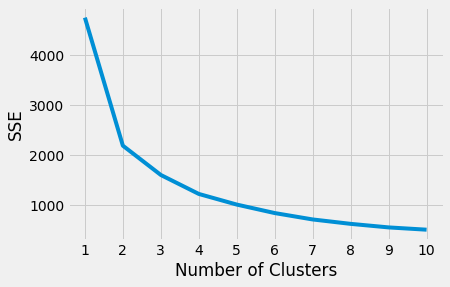

In [32]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans.fit(data_transformed)

KMeans(init='random', n_clusters=5, random_state=42)

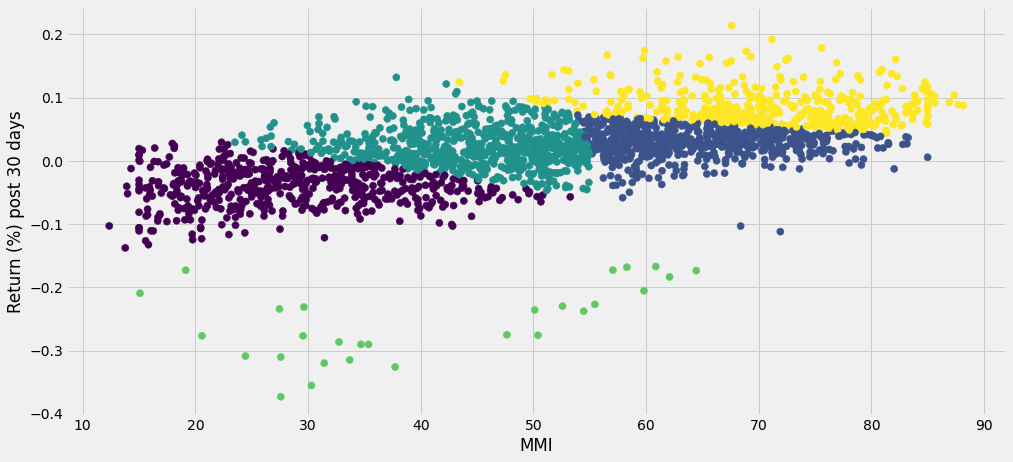

In [34]:
# Getting list of cluster numbers for each data point in X
clusters = kmeans.predict(data_transformed)

# Plotting values
color_map = clusters
plt.figure(figsize=(15, 7))
plt.scatter(selected_data.iloc[:, 0],
            selected_data.iloc[:, 1], c=color_map, s=50, cmap='viridis')

# Plotting centroids
centroids = kmeans.cluster_centers_
#plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('MMI')
plt.ylabel('Return (%) post 30 days')

plt.show()

In [35]:
#data_transformed['pct_change']=data[' Nifty Index'][7:].pct_change(-7).dropna().values

In [36]:
#data_transformed['sign']=np.sign(data[' Nifty Index'][:].pct_change(-1).dropna().values)

In [37]:
d=pd.DataFrame([clusters[-800:],data[' Nifty Index'][-800:].values]).T

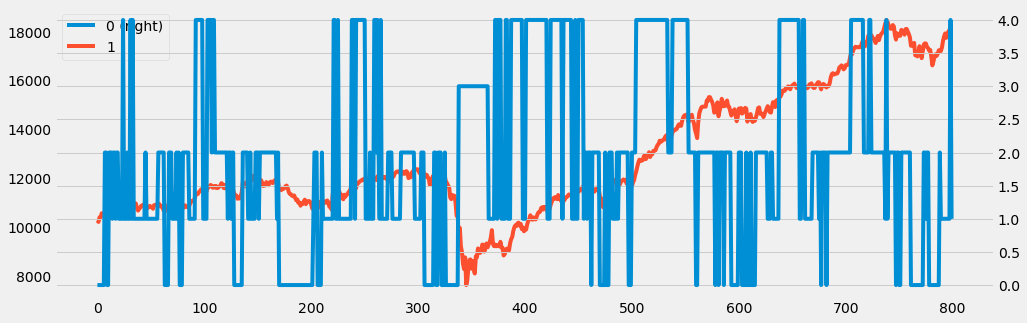

In [38]:
d.plot(secondary_y=[0],figsize=(15,5));

In [39]:
d.columns=['cluster','close']

In [40]:
d['signal']=np.where(d['cluster']==2,3,d['cluster'])
d['signal']=np.where(d['cluster']==1,0,d['cluster'])

In [41]:
final= d[['close','signal']]

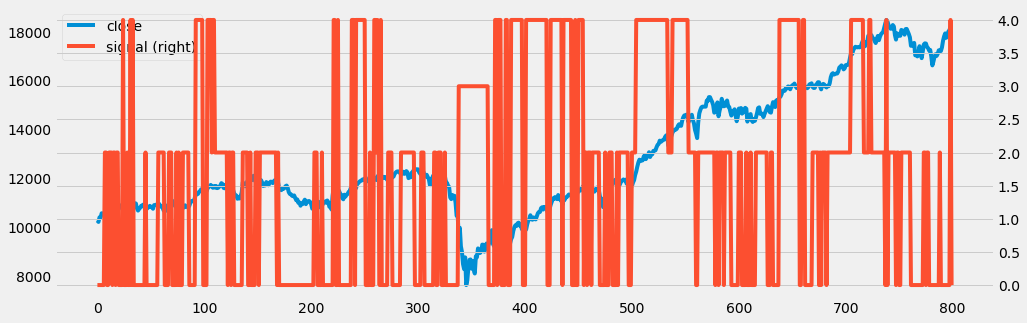

In [42]:
final.plot(secondary_y=['signal'],figsize=(15,5));